In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

### Importing the Dataset 

In [2]:
#Importing the dataset

df = pd.read_csv("C:\\Users\\91988\\Downloads\\dataset.csv")

#Displaying first five rows of the dataset
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


### Shape of the Dataset

In [3]:
#Using pandas "shape" method to check the dimensionality of the dataset

df.shape

(100000, 35)

### Column Names 

In [4]:
df.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

### Checking data type of all columns 

In [5]:
#Using pandas "dtypes" method to check the data type of all columns in the dataset

df.dtypes

hash                 object
millisecond           int64
classification       object
state                 int64
usage_counter         int64
prio                  int64
static_prio           int64
normal_prio           int64
policy                int64
vm_pgoff              int64
vm_truncate_count     int64
task_size             int64
cached_hole_size      int64
free_area_cache       int64
mm_users              int64
map_count             int64
hiwater_rss           int64
total_vm              int64
shared_vm             int64
exec_vm               int64
reserved_vm           int64
nr_ptes               int64
end_data              int64
last_interval         int64
nvcsw                 int64
nivcsw                int64
min_flt               int64
maj_flt               int64
fs_excl_counter       int64
lock                  int64
utime                 int64
stime                 int64
gtime                 int64
cgtime                int64
signal_nvcsw          int64
dtype: object

### Checking Missing Values 

In [6]:
#Using pandas "isnull" method to check missing values in the dataset

df.isnull().sum()

hash                 0
millisecond          0
classification       0
state                0
usage_counter        0
prio                 0
static_prio          0
normal_prio          0
policy               0
vm_pgoff             0
vm_truncate_count    0
task_size            0
cached_hole_size     0
free_area_cache      0
mm_users             0
map_count            0
hiwater_rss          0
total_vm             0
shared_vm            0
exec_vm              0
reserved_vm          0
nr_ptes              0
end_data             0
last_interval        0
nvcsw                0
nivcsw               0
min_flt              0
maj_flt              0
fs_excl_counter      0
lock                 0
utime                0
stime                0
gtime                0
cgtime               0
signal_nvcsw         0
dtype: int64

### Descriptive Analysis 

In [7]:
#Using pandas "describe" function to get the statistical summary of the dataset

df.describe()

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
count,100000.000000,1.000000e+05,100000.0,1.000000e+05,100000.000000,100000.0,100000.0,100000.0,100000.000000,100000.0,...,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.00000,100000.0,100000.0
mean,499.500000,1.577683e+05,0.0,3.069706e+09,18183.900070,0.0,0.0,0.0,15312.739510,0.0,...,32.991160,2.053130,117.920240,1.109190,3.204448e+09,385415.451970,4.059310,1.66142,0.0,0.0
std,288.676434,9.361726e+05,0.0,2.963061e+05,4609.792765,0.0,0.0,0.0,3256.475008,0.0,...,52.730176,13.881382,3.116892,2.160466,0.000000e+00,10144.036494,0.822848,3.26304,0.0,0.0
min,0.000000,0.000000e+00,0.0,3.069190e+09,13988.000000,0.0,0.0,0.0,9695.000000,0.0,...,0.000000,0.000000,112.000000,0.000000,3.204448e+09,371782.000000,3.000000,0.00000,0.0,0.0
25%,249.750000,0.000000e+00,0.0,3.069446e+09,14352.000000,0.0,0.0,0.0,12648.000000,0.0,...,1.000000,0.000000,114.000000,0.000000,3.204448e+09,378208.000000,3.000000,0.00000,0.0,0.0
50%,499.500000,0.000000e+00,0.0,3.069698e+09,16159.000000,0.0,0.0,0.0,15245.000000,0.0,...,9.000000,1.000000,120.000000,0.000000,3.204448e+09,383637.000000,4.000000,0.00000,0.0,0.0
75%,749.250000,4.096000e+03,0.0,3.069957e+09,22182.000000,0.0,0.0,0.0,17663.000000,0.0,...,46.000000,1.000000,120.000000,1.000000,3.204448e+09,390324.000000,5.000000,1.00000,0.0,0.0
max,999.000000,4.326605e+07,0.0,3.070222e+09,31855.000000,0.0,0.0,0.0,27157.000000,0.0,...,365.000000,256.000000,120.000000,18.000000,3.204448e+09,421913.000000,7.000000,15.00000,0.0,0.0


### Correlation 

In [8]:
#Using pandas "corr" method to check the correlation among different variables in the dataset

dfcorr = df.corr()
dfcorr

,millisecond,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,vm_truncate_count,task_size,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
millisecond,1.000000e+00,-0.038708,NaN,4.125287e-18,0.091229,NaN,NaN,NaN,0.284907,NaN,...,0.240078,-0.046854,-0.108636,0.167288,NaN,0.249216,0.222714,0.208772,NaN,NaN
state,-3.870821e-02,1.000000,NaN,-5.297331e-03,0.040396,NaN,NaN,NaN,0.074936,NaN,...,-0.004851,-0.000722,0.013344,-0.011872,NaN,0.078280,0.024537,-0.024711,NaN,NaN
usage_counter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prio,4.125287e-18,-0.005297,NaN,1.000000e+00,-0.137493,NaN,NaN,NaN,-0.197176,NaN,...,0.042366,0.010503,0.060631,-0.010575,NaN,-0.115542,0.007504,0.049742,NaN,NaN
static_prio,9.122893e-02,0.040396,NaN,-1.374934e-01,1.000000,NaN,NaN,NaN,0.617350,NaN,...,0.065555,0.000217,-0.408907,0.107777,NaN,0.773214,0.245480,-0.053098,NaN,NaN
normal_prio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vm_pgoff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vm_truncate_count,2.849068e-01,0.074936,NaN,-1.971759e-01,0.617350,NaN,NaN,NaN,1.000000,NaN,...,0.337080,0.010717,-0.390934,0.273491,NaN,0.864216,0.609531,0.240905,NaN,NaN
task_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Correlation Visualization 

<AxesSubplot:>

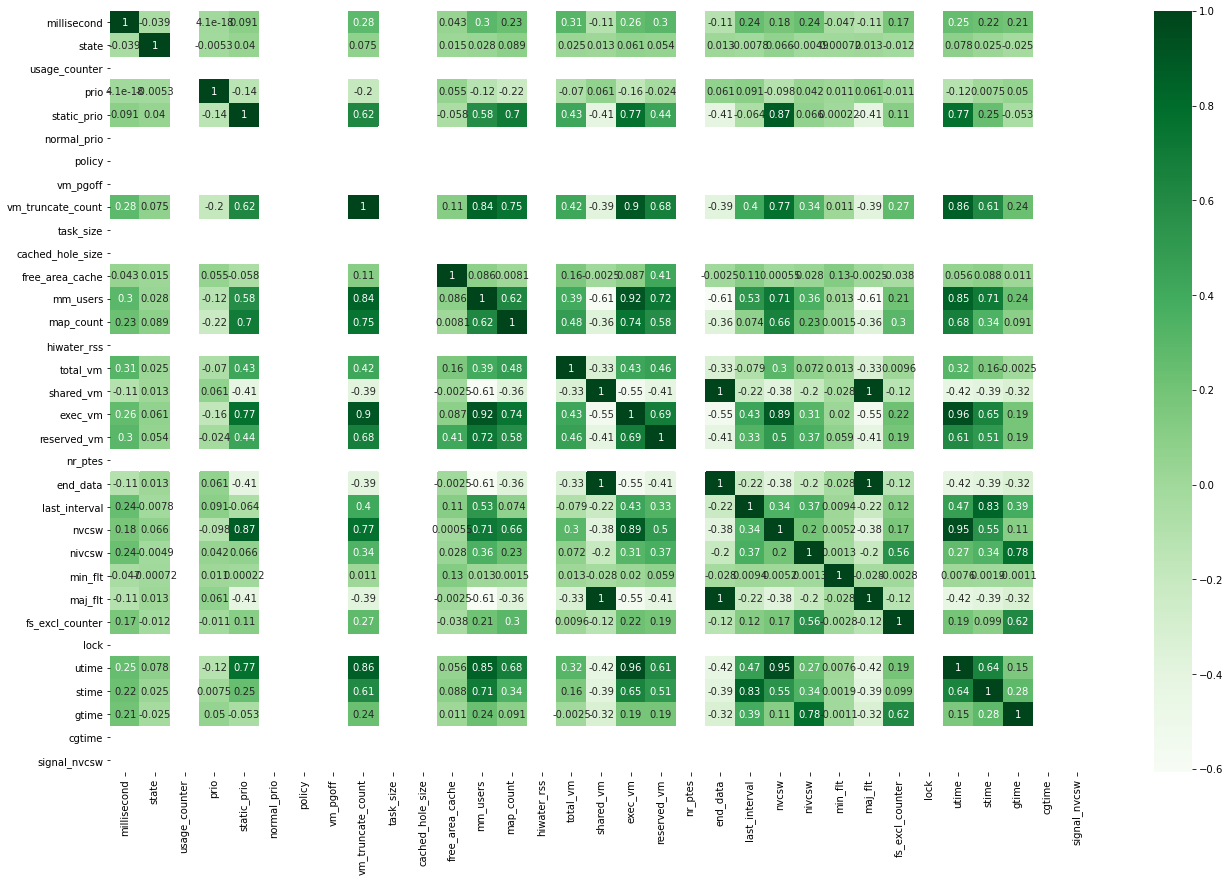

In [9]:
#Using seaborn's "heatmap" to visualize the correlation among variables 

plt.figure(figsize=(22,14))
sns.heatmap(dfcorr, annot = True, cmap = "Greens")

### Dropping columns which do not have any impact on the classification column and are not correlated with each other 

In [10]:
df = df.drop(['hash',"usage_counter","static_prio","normal_prio","policy","vm_pgoff","task_size","cached_hole_size","hiwater_rss","nr_ptes","lock","cgtime","signal_nvcsw","state","free_area_cache","min_flt","fs_excl_counter"],axis=1)

### Checking the correlation again on new and cleaned data 

<AxesSubplot:>

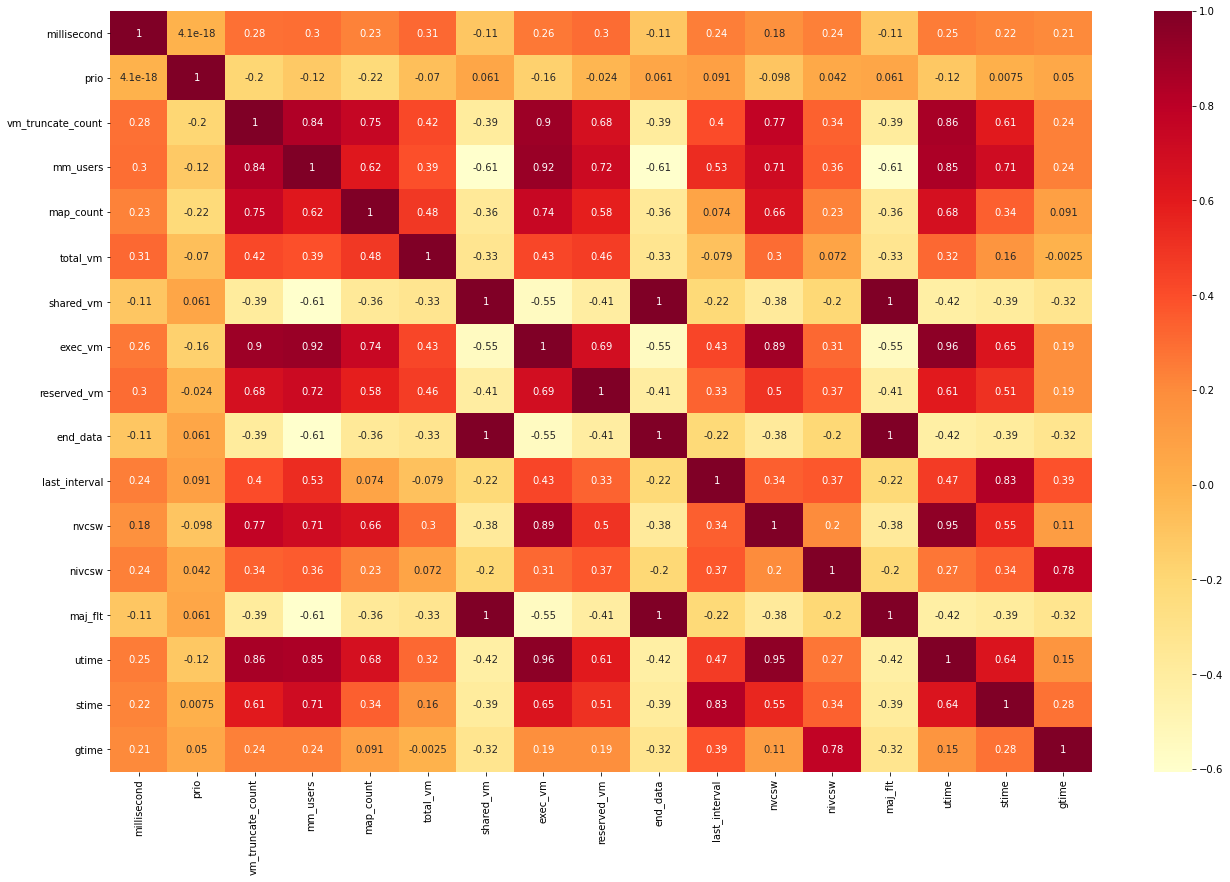

In [11]:
dfcorr1 = df.corr()
plt.figure(figsize=(22,14))
sns.heatmap(dfcorr1, annot = True, cmap = "YlOrRd")

In [12]:
df.shape

(100000, 18)

## Data Preprocessing 

In [13]:
#Defining the variables

#defining "x" or independent variables in the dataset

x = df.drop("classification", axis = 1).to_numpy()  

#placing target variable "classification" in y variable

y = df["classification"].to_numpy() 

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y, test_size=0.2,random_state=100)  

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 20000
number of training samples: 80000


In [15]:
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

## Model Building 

### Support Vector Machines and Naive Bayes 

In [16]:
for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


Estimator: SVM
[[9341  659]
 [ 420 9580]]
              precision    recall  f1-score   support

      benign       0.96      0.93      0.95     10000
     malware       0.94      0.96      0.95     10000

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000


Estimator: Naive Bayes
[[7696 2304]
 [2546 7454]]
              precision    recall  f1-score   support

      benign       0.75      0.77      0.76     10000
     malware       0.76      0.75      0.75     10000

    accuracy                           0.76     20000
   macro avg       0.76      0.76      0.76     20000
weighted avg       0.76      0.76      0.76     20000



### Decision Tree 

In [17]:
for name,method in [('DT', DecisionTreeClassifier(random_state=100))]:
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name))
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict)) 


Estimator: DT
[[ 9999     1]
 [    0 10000]]
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00     10000
     malware       1.00      1.00      1.00     10000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



### Thank You 